<a href="https://colab.research.google.com/github/webabdullah/data_science/blob/gh-pages/DS_UTS_Dry_Bean_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# import dataset
data = pd.read_csv('Dry_Beans_Dataset.csv')
data.head()


Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1  28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2  29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3  30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4  30140    620.134       201.847882  ...      0.941900      0.999166  SEKER

[5 rows x 17 columns]

In [ ]:
# deskripsi data
data.describe().T

count          mean  ...           75%            max
Area             13611.0  53048.284549  ...  61332.000000  254616.000000
Perimeter        13611.0    855.283459  ...    977.213000    1985.370000
MajorAxisLength  13611.0    320.141867  ...    376.495012     738.860154
MinorAxisLength  13611.0    202.270714  ...    217.031741     460.198497
AspectRation     13611.0      1.583242  ...      1.707109       2.430306
Eccentricity     13611.0      0.750895  ...      0.810466       0.911423
ConvexArea       13611.0  53768.200206  ...  62294.000000  263261.000000
EquivDiameter    13611.0    253.064220  ...    279.446467     569.374358
Extent           13611.0      0.749733  ...      0.786851       0.866195
Solidity         13611.0      0.987143  ...      0.990013       0.994677
roundness        13611.0      0.873282  ...      0.916869       0.990685
Compactness      13611.0      0.799864  ...      0.834270       0.987303
ShapeFactor1     13611.0      0.006564  ...      0.007271       0.010451
ShapeFactor2     13611.0      0.001716  ...      0.002170       0.003665
ShapeFactor3     13611.0      0.643590  ...      0.696006       0.974767
ShapeFactor4     13611.0      0.995063  ...      0.997883       0.999733

[16 rows x 8 columns]

In [ ]:
# replace zeros dengan nan supaya cleaning lebih mudah
data_copy = data.copy()
data_copy[['Area','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity']] = data_copy[['Area','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity']].replace(0,np.NaN)


In [ ]:
## tampilkan NaN
print(data_copy.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


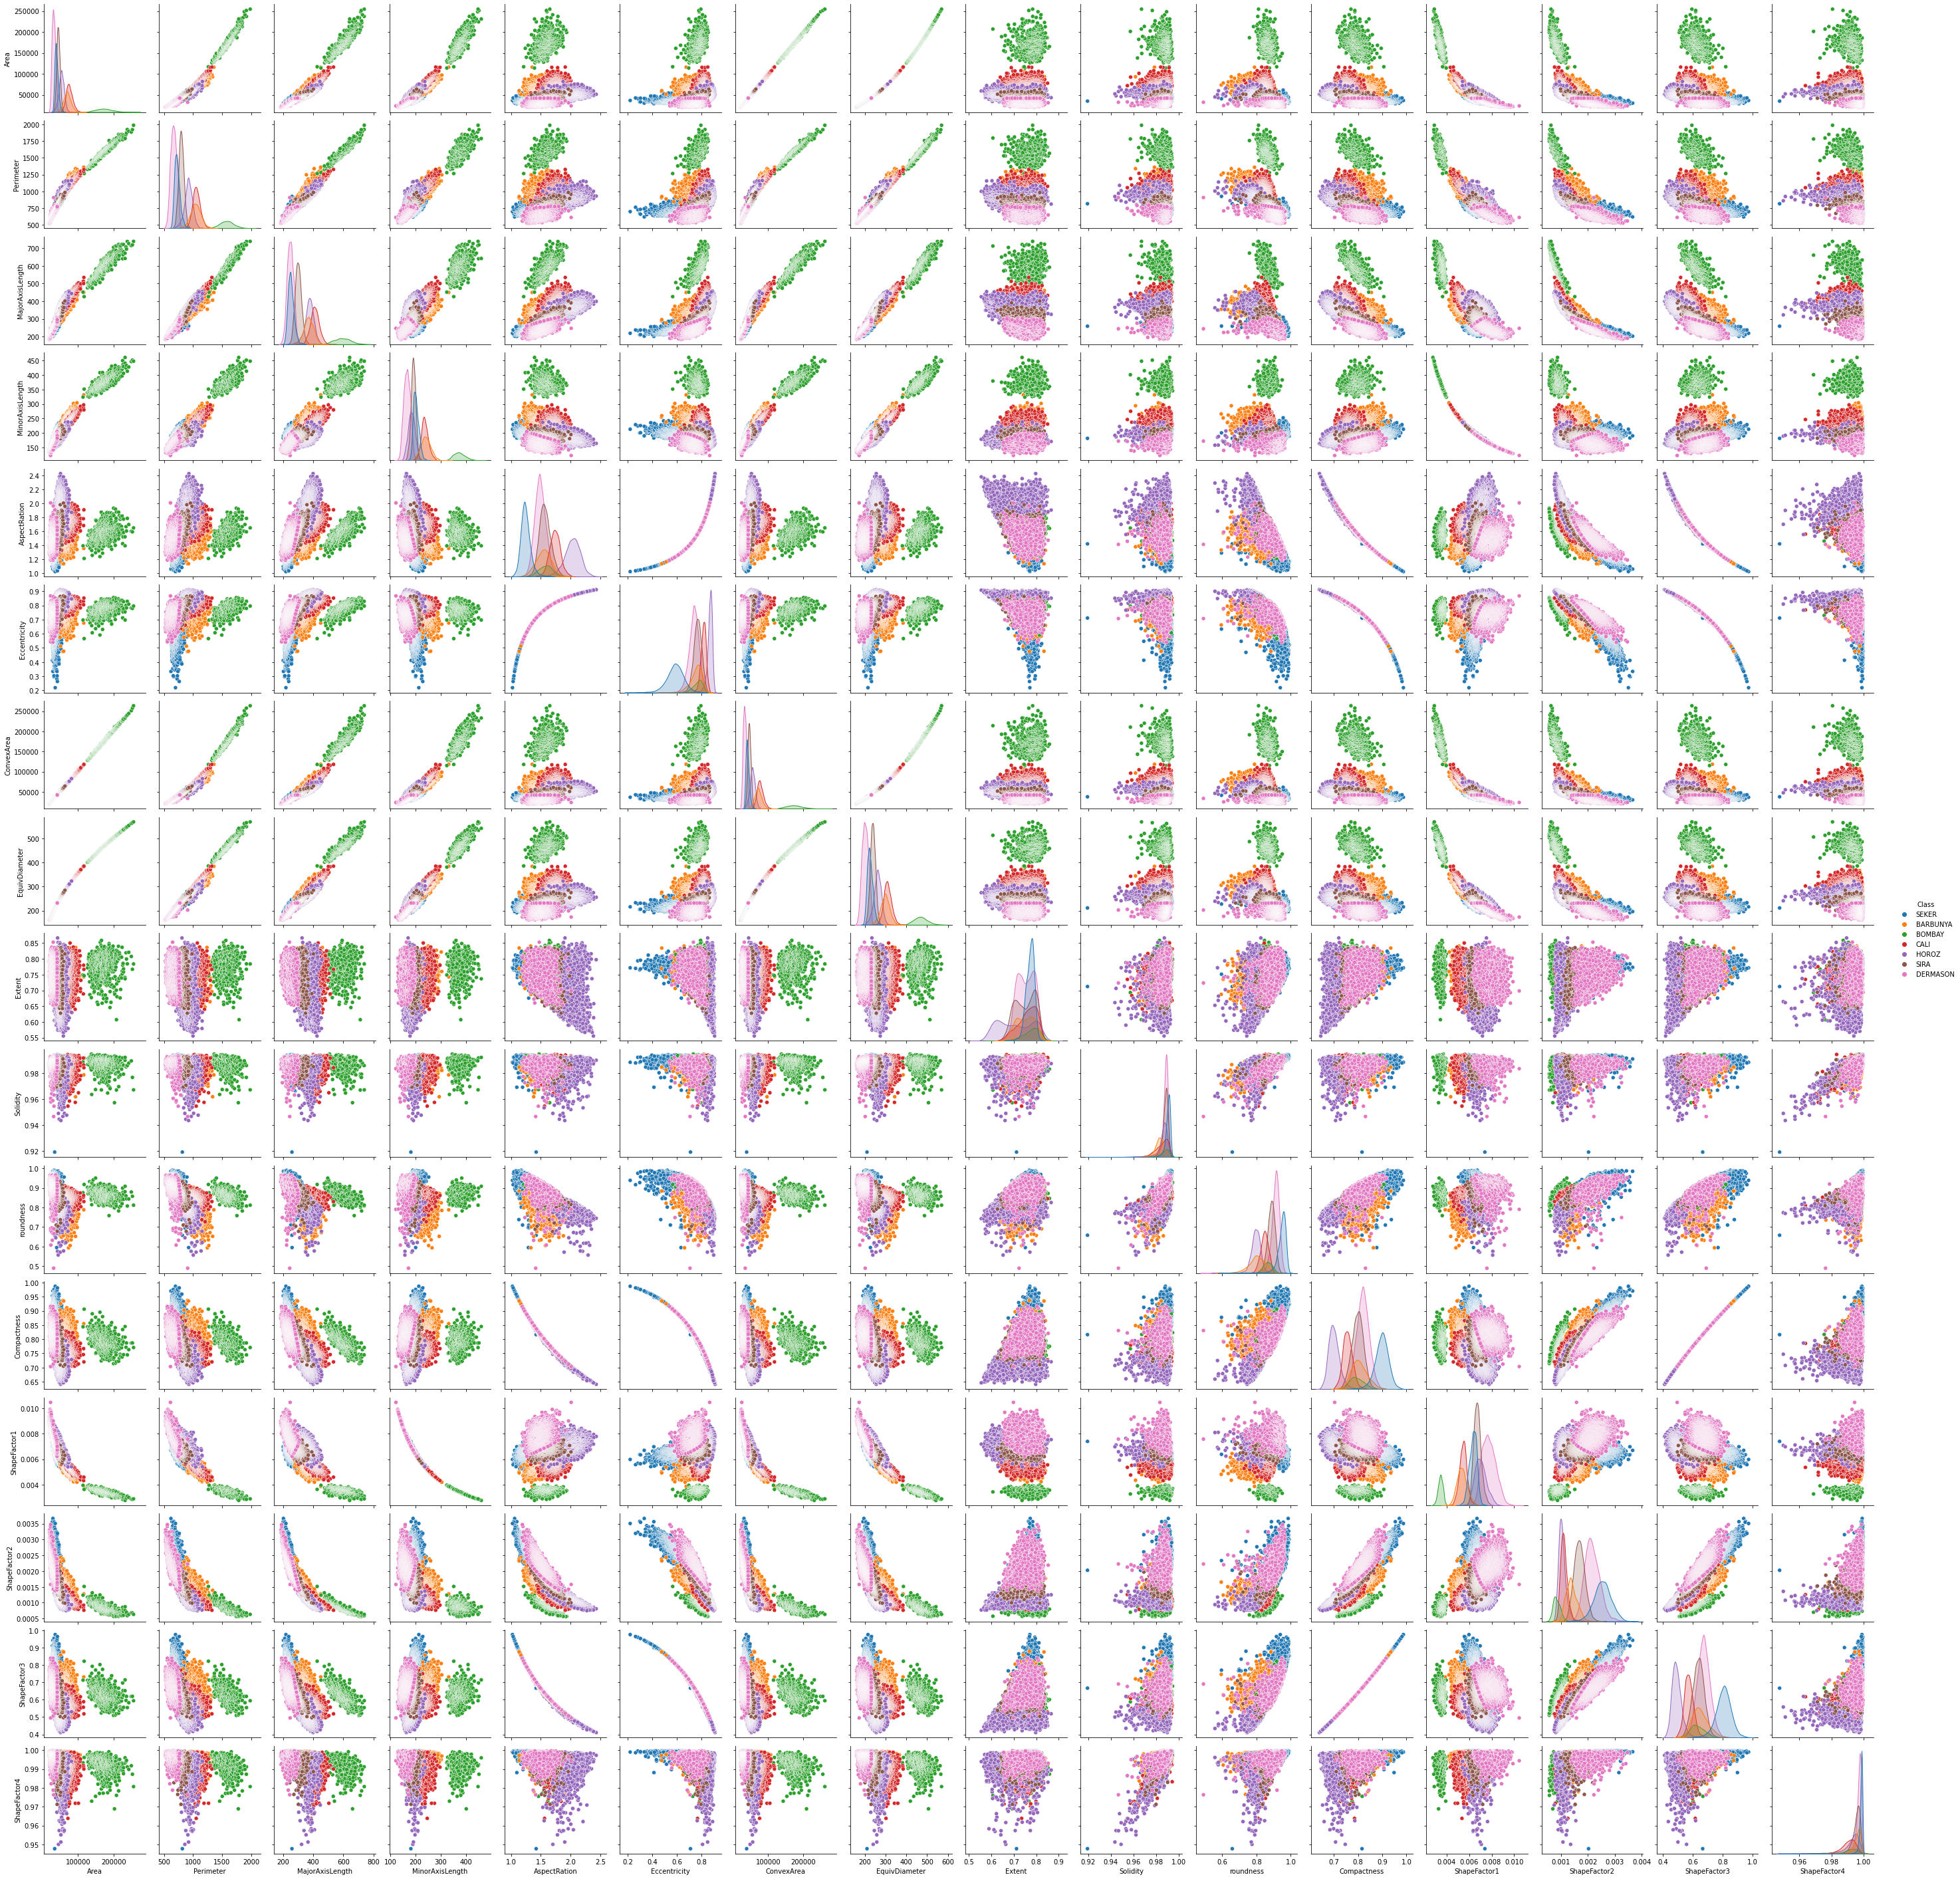

In [ ]:
# cek korelasi
p=sns.pairplot(data_copy, hue = 'Class')

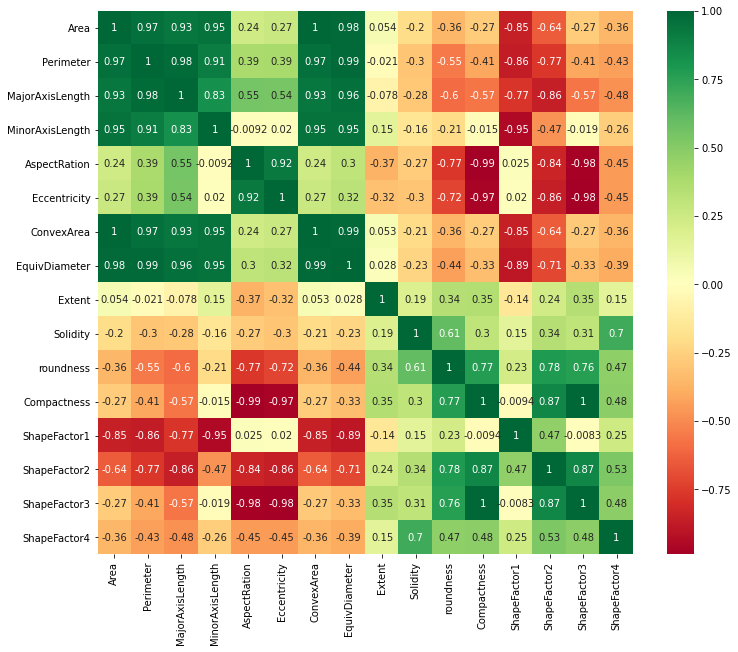

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
print(data_copy.isnull().sum())
data_copy.describe()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


Area     Perimeter  ...  ShapeFactor3  ShapeFactor4
count   13611.000000  13611.000000  ...  13611.000000  13611.000000
mean    53048.284549    855.283459  ...      0.643590      0.995063
std     29324.095717    214.289696  ...      0.098996      0.004366
min     20420.000000    524.736000  ...      0.410339      0.947687
25%     36328.000000    703.523500  ...      0.581359      0.993703
50%     44652.000000    794.941000  ...      0.642044      0.996386
75%     61332.000000    977.213000  ...      0.696006      0.997883
max    254616.000000   1985.370000  ...      0.974767      0.999733

[8 rows x 16 columns]

In [ ]:
data_copy.head()

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1  28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2  29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3  30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4  30140    620.134       201.847882  ...      0.941900      0.999166  SEKER

[5 rows x 17 columns]

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#blok coding no 8 tambahkan utk hapus nan
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#hapus yang nan
data_copy = data_copy.dropna() 

# optimasi data menggunakan scaler
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Class"],axis = 1),), columns=['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'])


In [ ]:
# cek data
X.head()

Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
0 -0.840749  -1.143319  ...      1.925723      0.838371
1 -0.829188  -1.013924  ...      2.689702      0.771138
2 -0.807157  -1.078829  ...      1.841356      0.916755
3 -0.785741  -0.977215  ...      2.204250     -0.197985
4 -0.781239  -1.097384  ...      3.013462      0.939640

[5 rows x 16 columns]

In [ ]:
# buat variabel target(y)
y = data_copy.Class

In [ ]:
#import train_test_split dan split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [ ]:
# membuat model untuk mencari jumlah K
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
#skor yang diperoleh dari data yang sama untuk training dan testing
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,
 list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
#skor yang diperoleh dari pengetesan menggunakan data testing
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,
 list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.17544633017413 % and k = [8]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


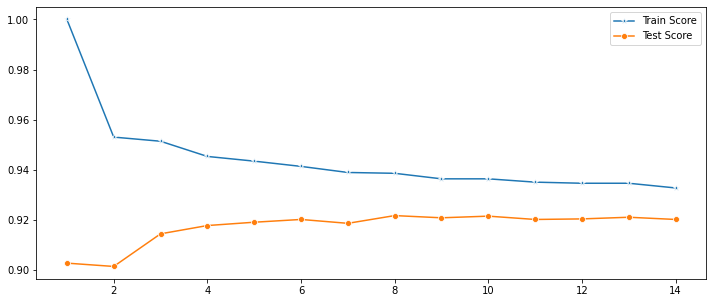

In [ ]:
# visualisasi
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#membuat model KNN dengan K yang sudah diperoleh
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9186687238263169

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 392,    0,   29,    0,    2,    7,   10],
       [   0,  174,    0,    0,    0,    0,    0],
       [  14,    0,  514,    0,   10,    2,    3],
       [   0,    0,    0, 1077,    0,   19,   86],
       [   0,    0,   11,    7,  612,    0,   13],
       [   2,    0,    0,   16,    0,  640,   18],
       [   2,    0,    4,   91,   11,   12,  759]])